In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

from mis_utils import *

import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Definiciones de constantes
node_names = np.array(('s', 'a', 'b', 't'))

# Balances: Sale desde s y llega hasta t
beq = np.array([0, 0, 0, 0])

capacities = np.array([[0, 5, 10, 0],
                       [0, 0, 6, 3],
                       [0, 0, 0, 3],
                       [0, 0, 0, 0]])

times = np.array([[0, 1, 3, 0],
                  [0, 0, 2, 1],
                  [0, 0, 0, 1],
                  [0, 0, 0, 0]])

node_start = 0
node_end = capacities.shape[1]-1

max_steps = 10

all_paths = get_all_paths_DFS(capacities, node_end, node_start)

final_matrix = np.zeros((max_steps, beq.shape[0]))

In [3]:
costs = max_time_on_seq(times, all_paths, node_names)

s -> a c(1) -> b c(2) -> t c(1)
s -> a c(1) -> t c(1)
s -> b c(3) -> t c(1)


In [4]:
costs

[4, 2, 4]

In [5]:
print("El máximo de tiempo es de ", max(costs))

El máximo de tiempo es de  4


# Matriz nodo-nodo

In [6]:
nn_new, nn_capacities, nn_names = unroll_time_serie(capacities, times, all_paths, max_steps, node_names,  max(costs))

In [7]:
beq_new = np.zeros(nn_new.shape[0])

In [8]:
pd.DataFrame(data = nn_new, columns=nn_names, index=nn_names)

,s,s0,a0,b0,t0,s1,a1,b1,t1,s2,a2,b2,t2,s3,a3,b3,t3,s4,a4,b4,t4,s5,a5,b5,t5,s6,a6,b6,t6,s7,a7,b7,t7,s8,a8,b8,t8,s9,a9,b9,t9,s10,a10,b10,t10,t
s,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
s0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
t0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
s1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
t1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
s2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Verificación de que no me olvidé de llenar nada
((nn_capacities == 0) == (nn_new == 0)).sum() == nn_capacities.shape[0]*nn_capacities.shape[1]

True

In [10]:
all_paths_ext = get_all_paths_DFS(capacities, capacities.shape[0], 0)

In [11]:
all_paths_ext = get_all_paths_DFS(nn_new, nn_new.shape[0]-1, node_start)
costs_ext = max_time_on_seq(nn_new, all_paths_ext, nn_names)

s -> s0 c(1) -> a1 c(1) -> t2 c(1) -> t c(1)
s -> s0 c(1) -> a1 c(1) -> b3 c(1) -> t4 c(1) -> t c(1)
s -> s0 c(1) -> b3 c(1) -> t4 c(1) -> t c(1)
s -> s1 c(1) -> a2 c(1) -> t3 c(1) -> t c(1)
s -> s1 c(1) -> a2 c(1) -> b4 c(1) -> t5 c(1) -> t c(1)
s -> s1 c(1) -> b4 c(1) -> t5 c(1) -> t c(1)
s -> s2 c(1) -> a3 c(1) -> t4 c(1) -> t c(1)
s -> s2 c(1) -> a3 c(1) -> b5 c(1) -> t6 c(1) -> t c(1)
s -> s2 c(1) -> b5 c(1) -> t6 c(1) -> t c(1)
s -> s3 c(1) -> a4 c(1) -> t5 c(1) -> t c(1)
s -> s3 c(1) -> a4 c(1) -> b6 c(1) -> t7 c(1) -> t c(1)
s -> s3 c(1) -> b6 c(1) -> t7 c(1) -> t c(1)
s -> s4 c(1) -> a5 c(1) -> t6 c(1) -> t c(1)
s -> s4 c(1) -> a5 c(1) -> b7 c(1) -> t8 c(1) -> t c(1)
s -> s4 c(1) -> b7 c(1) -> t8 c(1) -> t c(1)
s -> s5 c(1) -> a6 c(1) -> t7 c(1) -> t c(1)
s -> s5 c(1) -> a6 c(1) -> b8 c(1) -> t9 c(1) -> t c(1)
s -> s5 c(1) -> b8 c(1) -> t9 c(1) -> t c(1)
s -> s6 c(1) -> a7 c(1) -> t8 c(1) -> t c(1)
s -> s6 c(1) -> a7 c(1) -> b9 c(1) -> t10 c(1) -> t c(1)
s -> s6 c(1) -> b9 c(1

# Matriz Nodo - Arco

In [12]:
Aeq, arc_idxs = nn2na(nn_new, node_names = nn_names)
nan_names = get_col_names(nn_new, nn_names, as_numpy=True, sep = '.')

In [13]:
pd.DataFrame(data=Aeq, columns=nan_names, index=nn_names)

,s.s0,s.s1,s.s2,s.s3,s.s4,s.s5,s.s6,s.s7,s.s8,s.s9,s.s10,s0.a1,s0.b3,t0.t,s1.a2,s1.b4,a1.t2,a1.b3,t1.t,s2.a3,s2.b5,a2.t3,a2.b4,t2.t,s3.a4,s3.b6,a3.t4,a3.b5,b3.t4,t3.t,s4.a5,s4.b7,a4.t5,a4.b6,b4.t5,t4.t,s5.a6,s5.b8,a5.t6,a5.b7,b5.t6,t5.t,s6.a7,s6.b9,a6.t7,a6.b8,b6.t7,t6.t,s7.a8,s7.b10,a7.t8,a7.b9,b7.t8,t7.t,s8.a9,a8.t9,a8.b10,b8.t9,t8.t,s9.a10,a9.t10,b9.t10,t9.t,t10.t,t.s
s,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
s0,-1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
t0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
s1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
t1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
s2,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Límites y costos

In [14]:
bounds = get_col_capacites(nn_capacities, arc_idxs)
cost = np.zeros(len(bounds))
cost[-1]=-1

In [15]:
df_adic = pd.DataFrame(bounds, index=nan_names, columns=['Min', 'Max'])
df_adic['Costo'] = cost
df_adic

,Min,Max,Costo
s.s0,0,NaN,0.0
s.s1,0,NaN,0.0
s.s2,0,NaN,0.0
s.s3,0,NaN,0.0
s.s4,0,NaN,0.0
s.s5,0,NaN,0.0
s.s6,0,NaN,0.0
s.s7,0,NaN,0.0
s.s8,0,NaN,0.0
s.s9,0,NaN,0.0


# Optimización

In [16]:
# Optimización
res = linprog(cost, A_eq=Aeq, b_eq=beq_new, bounds=bounds, method='simplex')

selarcs = get_selected_arcs(res.x, nan_names)

/home/diego/.virtualenvs/OS11/lib/python3.6/site-packages/ipykernel_launcher.py:2: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  


In [17]:
pd.DataFrame([res.x], columns=nan_names, index=['Flujo'])

,s.s0,s.s1,s.s2,s.s3,s.s4,s.s5,s.s6,s.s7,s.s8,s.s9,s.s10,s0.a1,s0.b3,t0.t,s1.a2,s1.b4,a1.t2,a1.b3,t1.t,s2.a3,s2.b5,a2.t3,a2.b4,t2.t,s3.a4,s3.b6,a3.t4,a3.b5,b3.t4,t3.t,s4.a5,s4.b7,a4.t5,a4.b6,b4.t5,t4.t,s5.a6,s5.b8,a5.t6,a5.b7,b5.t6,t5.t,s6.a7,s6.b9,a6.t7,a6.b8,b6.t7,t6.t,s7.a8,s7.b10,a7.t8,a7.b9,b7.t8,t7.t,s8.a9,a8.t9,a8.b10,b8.t9,t8.t,s9.a10,a9.t10,b9.t10,t9.t,t10.t,t.s
Flujo,9.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,3.0,0.0,-0.0,9.0,0.0,0.0,9.0,0.0,3.0,6.0,0.0,9.0,0.0,3.0,6.0,3.0,9.0,0.0,3.0,6.0,6.0,3.0,9.0,0.0,3.0,6.0,6.0,9.0,9.0,0.0,3.0,6.0,6.0,9.0,9.0,0.0,3.0,6.0,6.0,9.0,3.0,0.0,3.0,6.0,6.0,9.0,3.0,3.0,0.0,6.0,9.0,-0.0,3.0,6.0,9.0,9.0,69.0


In [18]:
print('## Results ##')
print('The raw solution will be: %s' % res.x)
# print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
print('The minimum cost will be: %0.2f ' % res.fun)

## Results ##
The raw solution will be: [ 9.  9.  9.  9.  9.  9.  9.  3.  3.  0. -0.  9.  0.  0.  9.  0.  3.  6.
  0.  9.  0.  3.  6.  3.  9.  0.  3.  6.  6.  3.  9.  0.  3.  6.  6.  9.
  9.  0.  3.  6.  6.  9.  9.  0.  3.  6.  6.  9.  3.  0.  3.  6.  6.  9.
  3.  3.  0.  6.  9. -0.  3.  6.  9.  9. 69.]
The minimum cost will be: -69.00 


In [19]:
res

     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
     fun: -69.0
 message: 'Optimization terminated successfully.'
     nit: 79
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  3.,  3.,  0., -0.,  9.,  0.,
        0.,  9.,  0.,  3.,  6.,  0.,  9.,  0.,  3.,  6.,  3.,  9.,  0.,
        3.,  6.,  6.,  3.,  9.,  0.,  3.,  6.,  6.,  9.,  9.,  0.,  3.,
        6.,  6.,  9.,  9.,  0.,  3.,  6.,  6.,  9.,  3.,  0.,  3.,  6.,
        6.,  9.,  3.,  3.,  0.,  6.,  9., -0.,  3.,  6.,  9.,  9., 69.])

In [20]:
df_adic['Flujos'] = res.x

In [21]:
df_adic.transpose()

,s.s0,s.s1,s.s2,s.s3,s.s4,s.s5,s.s6,s.s7,s.s8,s.s9,s.s10,s0.a1,s0.b3,t0.t,s1.a2,s1.b4,a1.t2,a1.b3,t1.t,s2.a3,s2.b5,a2.t3,a2.b4,t2.t,s3.a4,s3.b6,a3.t4,a3.b5,b3.t4,t3.t,s4.a5,s4.b7,a4.t5,a4.b6,b4.t5,t4.t,s5.a6,s5.b8,a5.t6,a5.b7,b5.t6,t5.t,s6.a7,s6.b9,a6.t7,a6.b8,b6.t7,t6.t,s7.a8,s7.b10,a7.t8,a7.b9,b7.t8,t7.t,s8.a9,a8.t9,a8.b10,b8.t9,t8.t,s9.a10,a9.t10,b9.t10,t9.t,t10.t,t.s
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,10.0,10.0,3.0,6.0,NaN,10.0,10.0,3.0,6.0,NaN,10.0,10.0,3.0,6.0,6.0,NaN,10.0,10.0,3.0,6.0,6.0,NaN,10.0,10.0,3.0,6.0,6.0,NaN,10.0,10.0,3.0,6.0,6.0,NaN,10.0,10.0,3.0,6.0,6.0,NaN,10.0,3.0,6.0,6.0,NaN,10.0,3.0,6.0,NaN,NaN,NaN
Costo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
Flujos,9.0,9.0,9.0,9.0,9.0,9.0,9.0,3.0,3.0,0.0,-0.0,9.0,0.0,0.0,9.0,0.0,3.0,6.0,0.0,9.0,0.0,3.0,6.0,3.0,9.0,0.0,3.0,6.0,6.0,3.0,9.0,0.0,3.0,6.0,6.0,9.0,9.0,0.0,3.0,6.0,6.0,9.0,9.0,0.0,3.0,6.0,6.0,9.0,3.0,0.0,3.0,6.0,6.0,9.0,3.0,3.0,0.0,6.0,9.0,-0.0,3.0,6.0,9.0,9.0,69.0


In [22]:
branches = df_adic.index

In [23]:
interesting_columns = []
for i in range(max_steps+1):
    interesting_columns.append("t{}.t".format(i))

In [24]:
df_adic['Flujos'].transpose()[interesting_columns]

t0.t     0.0
t1.t     0.0
t2.t     3.0
t3.t     3.0
t4.t     9.0
t5.t     9.0
t6.t     9.0
t7.t     9.0
t8.t     9.0
t9.t     9.0
t10.t    9.0
Name: Flujos, dtype: float64

In [25]:
df_adic['Flujos'].transpose()[interesting_columns].sum()

69.0

In [26]:
flow = df_adic['Flujos'].transpose()[interesting_columns].values

In [27]:
acum = np.zeros(flow.shape)

In [28]:
for i in range(1, acum.shape[0]):
    acum[i] = acum[i-1]+flow[i]

In [29]:
acum

array([ 0.,  0.,  3.,  6., 15., 24., 33., 42., 51., 60., 69.])

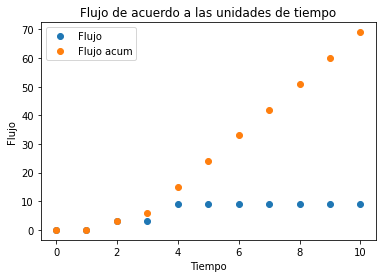

In [30]:
plt.plot(np.arange(max_steps+1), flow, 'o')
plt.plot(np.arange(max_steps+1), acum, 'o')

plt.legend(["Flujo", "Flujo acum"])
plt.xlabel("Tiempo")
plt.ylabel("Flujo")
plt.title("Flujo de acuerdo a las unidades de tiempo")
plt.show()